# Credit card fraud detection project 
## travail réalisé par **Mohamed TROMBATI**

## Objectif principale du projet 

Développer une première expérience pratique complète en machine learning et data science en suivant
les étapes fondamentales d'un projet réel, depuis l'exploration des données jusqu'au déploiement d'un modèle.

## Importation des bibliothèques nécessaires

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

## Chargement du dataset

In [2]:
# Entrer le dataset 
df= pd.read_csv(r"C:\Users\hp\Desktop\summerproject\Creditcarfraudetection\data\creditcard.csv")
print(df.head())  #df.head() permet d'afficher les 5 premières lignes
print("---------------------------------------------------\n")
print(df.shape) # df.shape donne lignes, colonnes 
print("---------------------------------------------------\n")
print(df.columns) # donne les noms des colonnes dans le fichier .csv
print("---------------------------------------------------\n")
print(df.info())
print("---------------------------------------------------\n")
print(df.describe())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [3]:
df['Class'].value_counts() 
# cette commande permet de selectionner la colonne Class dans le Dataframe
# et de compter le nombre d'occurences de chaque valeur unique dans cette colonne.

Class
0    284315
1       492
Name: count, dtype: int64

array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

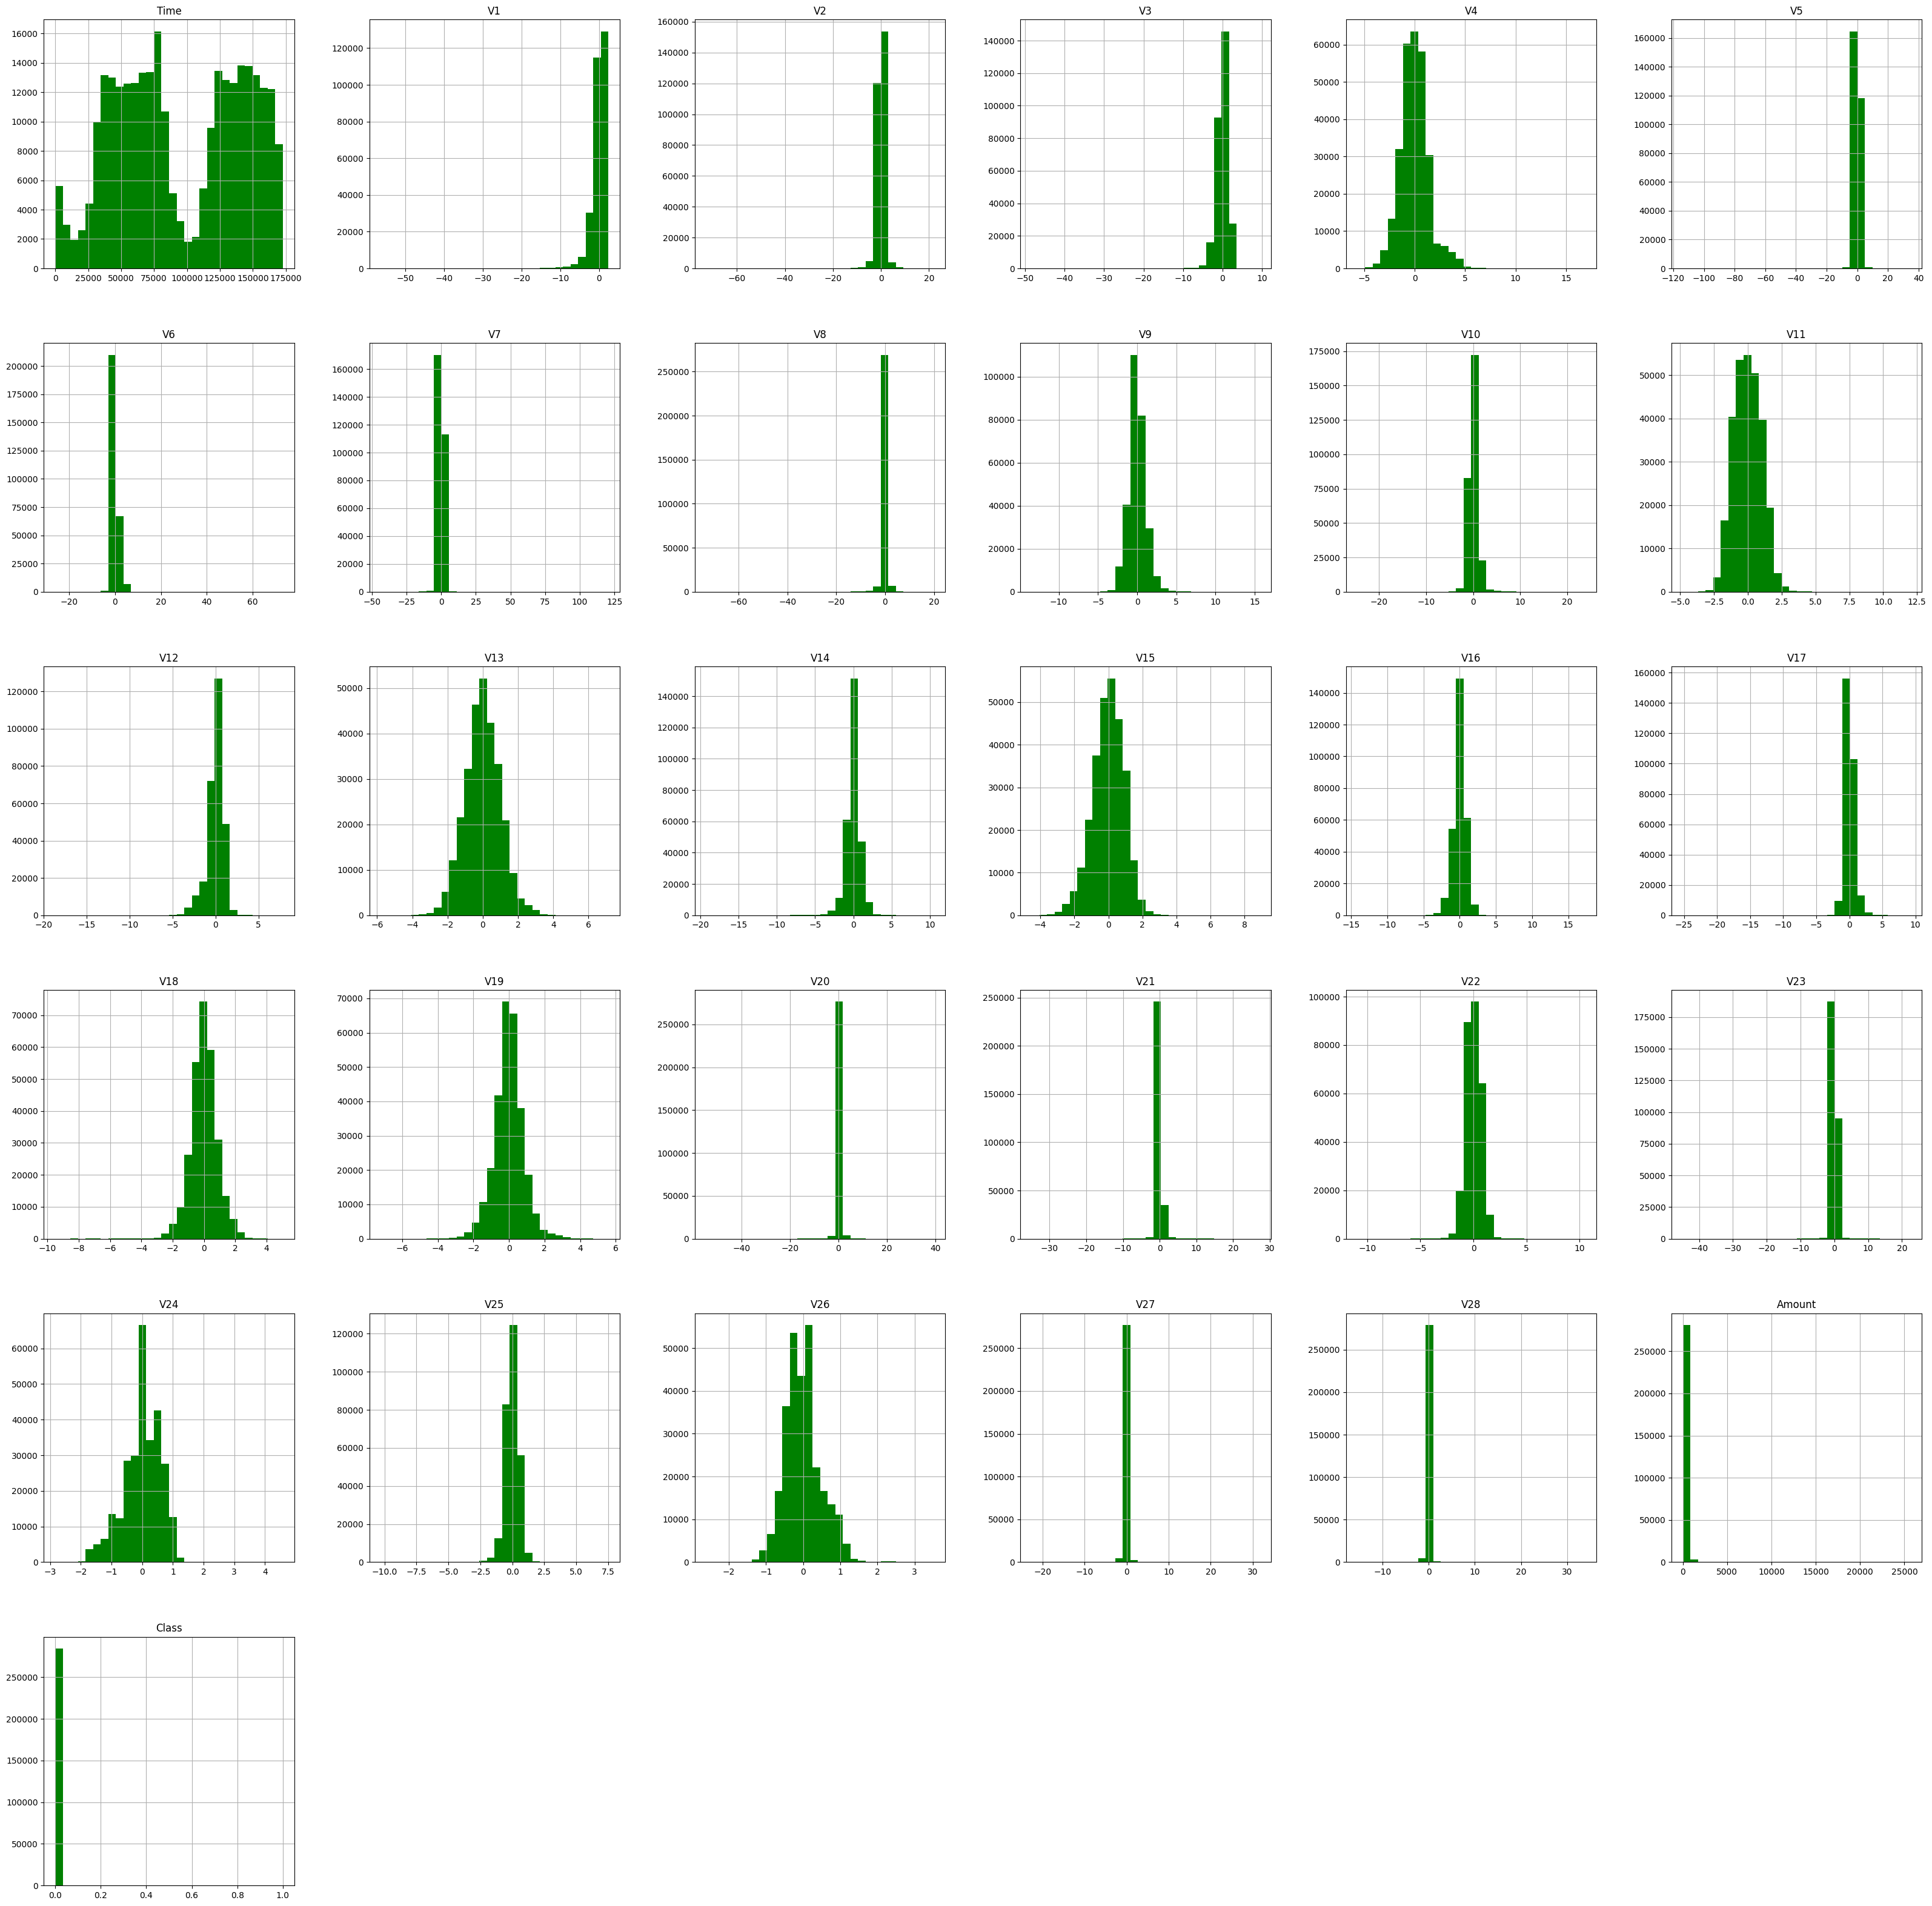

In [4]:
# Cette commande sert à visualiser la distribution des différentes données dans le dataframe
df.hist(bins=30, figsize=(40,40), color='green')

## Répartion des transactions frauduleuses et normales

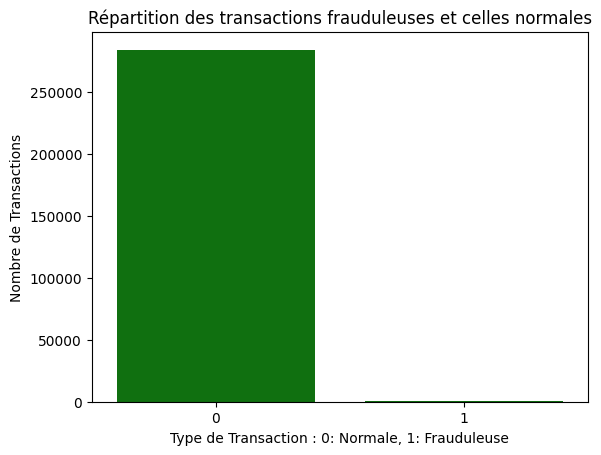

In [5]:
#On peut visualiser cela, et on remarque que les transactions frauduleuses sont minoritaires
sns.countplot(x='Class', data=df, color='green')
plt.title("Répartition des transactions frauduleuses et celles normales")
plt.xlabel("Type de Transaction : 0: Normale, 1: Frauduleuse")
plt.ylabel("Nombre de Transactions")
plt.show()

In [6]:
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

## Remarque 
 On peut remarquer que la colonne Amount contient des valeurs grandes tandis que les
 colonnes V1, V2, ....,V28 sont des nombres proches de 0. Ainsi il est nécessaire de 
 recourir à la  stanrdardisation de la colonne Amount pour éviter tout problème 
 d'interpretation, on va aussi éléminer la colonne Time qui nous est inutile dans notre 
 analyse. 

## Standardisation

In [7]:
scaler= StandardScaler()
df_scaled= df.copy()
df_scaled['Scaled_amount']= scaler.fit_transform(df_scaled['Amount'].values.reshape(-1,1))
df_scaled= df_scaled.drop(['Time','Amount'], axis=1) # elimine les colonnes Time et Amount
print(df_scaled.head())

         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.098698  0.363787  0.090794  ... -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425 -0.166974  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  0.207643  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  0.753074  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Class  Scaled_amount  
0 

## Utilisation de la méthode train_test_split 

## Logistic Regression : modèle de classification

In [8]:
# Séparer les variables ( X: features et y : target)
X = df_scaled.drop('Class', axis=1)
y= df_scaled['Class']
# Diviser le données de sorte que notre modèle puissent s'entrainer sur 80% et tester sur 20% des données
X_train,X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=30, stratify=y)
# stratify=y permet de garder la meme proportion de fraudes dans train et test
print("La taille de X_train est :", X_train.shape, "\n") # 80%
print("La taille de X_test est :", X_test.shape, "\n") # 20%


La taille de X_train est : (227845, 29) 

La taille de X_test est : (56962, 29) 



In [9]:
# On va utiliser LogisticRegression pour créer le modèle et l'entrainer
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)
# Analyse de y_pred
print("Prédiction de  Classe (0 ou 1) \n", y_pred)
print(" Taille de y_pred:", y_pred.shape)
print(" Le nombre de prédictions de cas de classe 0 :\n", np.sum(y_pred==0))
print(" Le nombre de prédictions de cas de classe 1 :\n", np.sum(y_pred==1))
# Analyse y_proba
print("---------------------------------------\n")
print("Probabilité pour chaque classe avec le format [probabilité_classe_0, probabilité_classe_1]:\n", y_proba)
print(" Taille de y_proba:", y_proba.shape)


Prédiction de  Classe (0 ou 1) 
 [0 0 0 ... 0 0 0]
 Taille de y_pred: (56962,)
 Le nombre de prédictions de cas de classe 0 :
 56899
 Le nombre de prédictions de cas de classe 1 :
 63
---------------------------------------

Probabilité pour chaque classe avec le format [probabilité_classe_0, probabilité_classe_1]:
 [[9.99922265e-01 7.77348324e-05]
 [9.99938168e-01 6.18317243e-05]
 [9.99913647e-01 8.63530104e-05]
 ...
 [9.99933774e-01 6.62259309e-05]
 [9.99712837e-01 2.87163114e-04]
 [9.99915290e-01 8.47103870e-05]]
 Taille de y_proba: (56962, 2)


## Rapport de Classification et matrice de confusion : cas normale

In [10]:
# Rapport de classification
print("Rapport de classification: \n",classification_report(y_test, y_pred))
# Matrice de confusion
print("Matrice de confusion:\n", confusion_matrix(y_test, y_pred))

Rapport de classification: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.84      0.54      0.66        98

    accuracy                           1.00     56962
   macro avg       0.92      0.77      0.83     56962
weighted avg       1.00      1.00      1.00     56962

Matrice de confusion:
 [[56854    10]
 [   45    53]]


In [11]:
y_proba_2= model.predict_proba(X_test)[:,1]
y_pred_2= (y_proba_2 > 0.7).astype(int)
print("Rapport de classification: \n", classification_report(y_test, y_pred_2))

Rapport de classification: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.51      0.65        98

    accuracy                           1.00     56962
   macro avg       0.94      0.76      0.82     56962
weighted avg       1.00      1.00      1.00     56962



## Oversampling

In [13]:
# Oversampling
smote= SMOTE(random_state=42)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
print("La répartition des cas frauduleux et non frauduleux avant SMOTE \n", y_train.value_counts(),"\n")
print("La répartition des cas frauduleux et non frauduleux après SMOTE \n", y_train_over.value_counts(),"\n")

La répartition des cas frauduleux et non frauduleux avant SMOTE 
 Class
0    227451
1       394
Name: count, dtype: int64 

La répartition des cas frauduleux et non frauduleux après SMOTE 
 Class
0    227451
1    227451
Name: count, dtype: int64 



## Rapport de Classification et matrice de confusion : cas du oversampling

In [14]:
model_over = LogisticRegression(max_iter=1000, random_state=42)
model_over.fit(X_train_over, y_train_over)
y_pred_over = model_over.predict(X_test)
# Rapport de classification
print("Rapport de classification: \n",classification_report(y_test, y_pred_over))
# Matrice de confusion
print("Matrice de confusion:\n", confusion_matrix(y_test, y_pred_over))

Rapport de classification: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.87      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.92      0.55     56962
weighted avg       1.00      0.98      0.99     56962

Matrice de confusion:
 [[55534  1330]
 [   13    85]]


## Undersampling 

In [15]:
# Undersampling
normal= df_scaled[df_scaled['Class']==0]
fraud = df_scaled[df_scaled['Class']==1]
print(normal.shape)
print(fraud.shape)


(284315, 30)
(492, 30)


In [16]:
normal_sample=normal.sample(n=492)
new_df=pd.concat([normal_sample, fraud],ignore_index=True)
print(new_df.head())
print(new_df.shape)
print(new_df['Class'].value_counts())

         V1        V2        V3        V4        V5        V6        V7  \
0  2.128186 -1.088060 -0.768351 -1.115583 -0.727694  0.028209 -1.038998   
1 -0.614456  0.347375  0.942487  0.289119  1.319269 -0.934037  0.360745   
2  1.818106 -0.940895 -0.247885  0.894785 -1.242351 -0.596219 -0.627869   
3 -0.631099  0.493198  1.525857 -0.151424  0.857177  1.707637  0.261054   
4  1.138068 -0.011657  0.290350  0.107595 -0.030677  0.116183 -0.246092   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.069063 -0.091182  0.871877  ... -0.042287 -0.207477  0.223655 -1.066012   
1 -0.121012  1.050552 -0.855424  ... -0.022361 -0.044454 -0.111978 -0.547019   
2 -0.180251 -0.257458  0.935823  ...  0.095126  0.765141  0.041531  0.402173   
3  0.520020  0.074977 -0.088352  ... -0.077783  0.248158 -0.032880 -1.013214   
4  0.076638  1.159590 -0.402369  ... -0.060806  0.082637  0.011508 -0.278928   

        V25       V26       V27       V28  Class  Scaled_amount  
0 

In [17]:
X_under = new_df.drop('Class', axis=1)
y_under= new_df['Class']
X_train_under,X_test_under, y_train_under, y_test_under=train_test_split(X_under,y_under, test_size=0.2, random_state=30, stratify=y_under)
model_under = LogisticRegression(max_iter=1000, random_state=42)
model_under.fit(X_train_under, y_train_under)
y_pred_under = model.predict(X_test_under)

## Rapport de Classification et matrice de confusion : cas du undersampling

In [18]:
# Rapport de classification
print("Rapport de classification: \n",classification_report(y_test_under, y_pred_under))
# Matrice de confusion
print("Matrice de confusion:\n", confusion_matrix(y_test_under, y_pred_under))

Rapport de classification: 
               precision    recall  f1-score   support

           0       0.75      1.00      0.86        98
           1       1.00      0.67      0.80        99

    accuracy                           0.83       197
   macro avg       0.87      0.83      0.83       197
weighted avg       0.87      0.83      0.83       197

Matrice de confusion:
 [[98  0]
 [33 66]]


## Analyse des résultats: Oversampling vs Undersampling
Avec SMOTE (oversampling), le modèle atteint un excellent rappel (0.87) pour la classe minoritaire mais au prix 
d’une très faible précision (0.06), générant beaucoup de faux positifs.
Avec undersampling, la précision de la classe 1 est parfaite (1.00) et l’équilibre global est meilleur, mais le 
rappel chute à 0.67, ce qui signifie qu’un tiers des fraudes ne sont pas détectées.Ainsi, SMOTE maximise la détection
des fraudes mais donne trop d’alertes fausses, tandis que l’undersampling réduit les erreurs mais en rate davantage.
L’accuracy élevée de SMOTE (0.98) est trompeuse car elle reflète surtout la bonne classification de la majorité.
Le choix dépend donc de la priorité métier : rappel élevé (SMOTE) ou précision élevée (undersampling).

## Conclusion

Ce projet avait pour objectif de détecter les transactions frauduleuses dans un dataset fortement déséquilibré.  
Après avoir testé différentes approches, nous avons comparé un modèle de régression logistique simple, 
l’oversampling (SMOTE) et l’undersampling.

Les résultats montrent que :
- **SMOTE** améliore nettement le rappel (87%), ce qui permet de détecter plus de fraudes, 
mais au prix d’une faible précision (6%).
- **Undersampling** offre une précision parfaite (100%) mais un rappel limité (67%), 
ce qui signifie que certaines fraudes ne sont pas détectées.

Ainsi, le choix du modèle dépend de la priorité métier :  
- Maximiser la détection des fraudes (rappel) au prix de fausses alertes (SMOTE).  
- Minimiser les fausses alertes mais accepter de rater quelques fraudes (undersampling).

En perspective, il serait intéressant de tester des modèles plus puissants (Random Forest, XGBoost) 
et d’optimiser le seuil de décision pour trouver un meilleur compromis entre précision et rappel.
